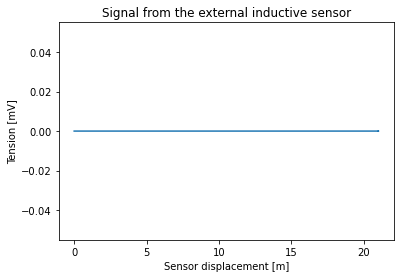

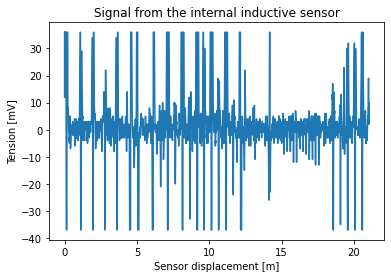

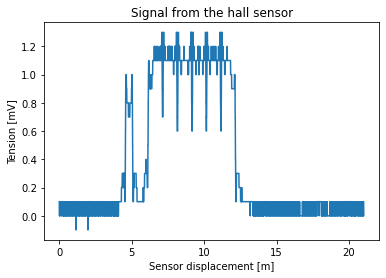

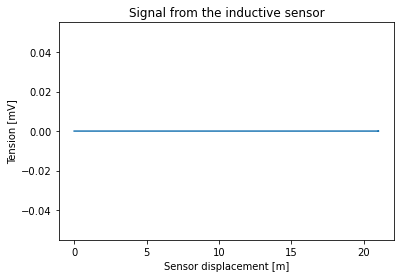

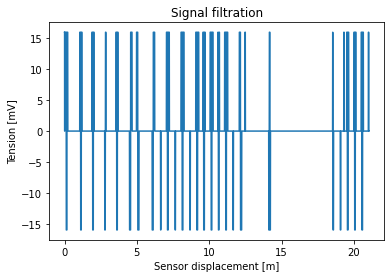

/home/artur/Programy/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


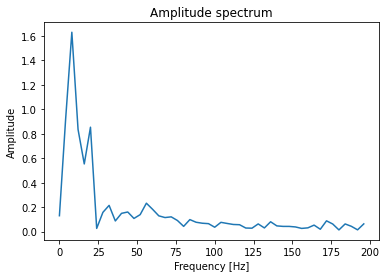

/home/artur/Programy/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


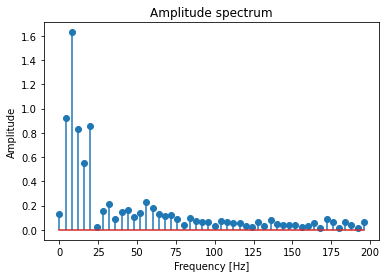

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft


input = np.loadtxt("L5_2021.txt", dtype='float', delimiter=',')

matrix = input

t = matrix[:,0]
x1 = matrix[:,1]
x2 = matrix[:,2]
x3 = matrix[:,3]
x4 = matrix[:,4]

t = t - 0.0025 

plt.plot(t, x1)
plt.title('Signal from the external inductive sensor')
plt.xlabel('Sensor displacement [m]')
plt.ylabel('Tension [mV]')
plt.show()

plt.plot(t, x2)
plt.title('Signal from the internal inductive sensor')
plt.xlabel('Sensor displacement [m]')
plt.ylabel('Tension [mV]')
plt.show()

plt.plot(t, x3)
plt.title('Signal from the hall sensor')
plt.xlabel('Sensor displacement [m]')
plt.ylabel('Tension [mV]')
plt.show()

plt.plot(t, x4)
plt.title('Signal from the inductive sensor')
plt.xlabel('Sensor displacement [m]')
plt.ylabel('Tension [mV]')
plt.show()

L = len(matrix[:,2])

A = []


for i in range(L):
    W = matrix[i,2]
    if W >= 16:
        A.append(16)
    elif W <= -16:
        A.append(-16)
    else: 
        A.append(0)


plt.plot(matrix[:,0],A)
plt.title('Signal filtration')
plt.xlabel('Sensor displacement [m]')
plt.ylabel('Tension [mV]')
plt.show()

y2 = matrix[6000:6100, 2]
F = 400
N = len(y2)
Y1 = fft(y2)
Y11 = ((Y1*np.conj(Y1))**0.5)/N
f = F * (np.linspace(0,N/2-1))/N


plt.plot(f, Y11[0:int(N/2)])
plt.title('Amplitude spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

plt.stem(f, Y11[0:int(N/2)])
plt.title('Amplitude spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()